# Classification Tree

In [29]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine  # Using the Wine dataset for a more complex example
from sklearn.model_selection import train_test_split, GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_text  # For textual representation of the tree



In [30]:
# Step 2: Load the Wine dataset
# The Wine dataset has 178 samples, 13 features, and 3 different classes (types of wine).
wine = load_wine()
X = wine.data  # Features (alcohol content, ash, etc.)
y = wine.target  # Labels (type of wine)


In [31]:
# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Step 4: Create a Decision Tree Classifier
# We'll create a Decision Tree model with default settings.
tree_clf = DecisionTreeClassifier(random_state=42)

In [33]:
# Step 5: Train the model
# We fit the Decision Tree model on the training data.
tree_clf.fit(X_train, y_train)

# Explanation: This step trains the Decision Tree by learning how to split the data based on features.

DecisionTreeClassifier(random_state=42)

In [34]:
# Step 6: Make predictions
# Now we use the trained model to make predictions on the test data.
y_pred = tree_clf.predict(X_test)

In [35]:
# Step 7: Evaluate the model
# To see how well the model performs, we calculate the accuracy and display a confusion matrix.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Explanation: Accuracy is the percentage of correct predictions out of the total test set.
# It gives a quick overview of model performance.

# Confusion matrix shows the number of correct and incorrect classifications for each class.
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 94.44%
Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


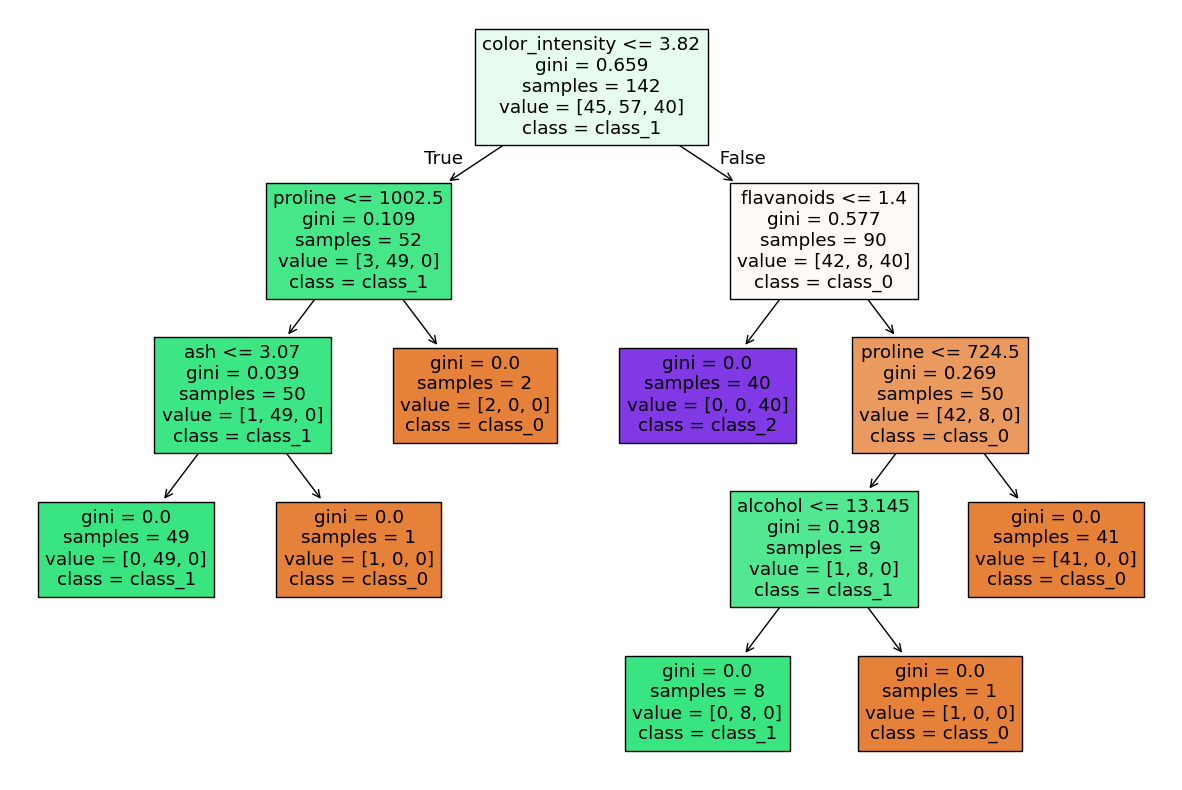

In [36]:
# Step 8: Visualize the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(tree_clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

# Explanation:
# - `feature_names` are the names of the features (sepal length, petal length, etc.).
# - `class_names` are the species of the iris flower (setosa, versicolor, virginica).
# - `filled=True` colors the nodes based on the majority class they predict, making the tree more interpretable.


In [37]:
# Step 9: Text representation of the tree (for large trees)
tree_text = export_text(tree_clf, feature_names=wine.feature_names)
print(tree_text)

|--- color_intensity <= 3.82
|   |--- proline <= 1002.50
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  1002.50
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- proline <= 724.50
|   |   |   |--- alcohol <= 13.14
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.14
|   |   |   |   |--- class: 0
|   |   |--- proline >  724.50
|   |   |   |--- class: 0



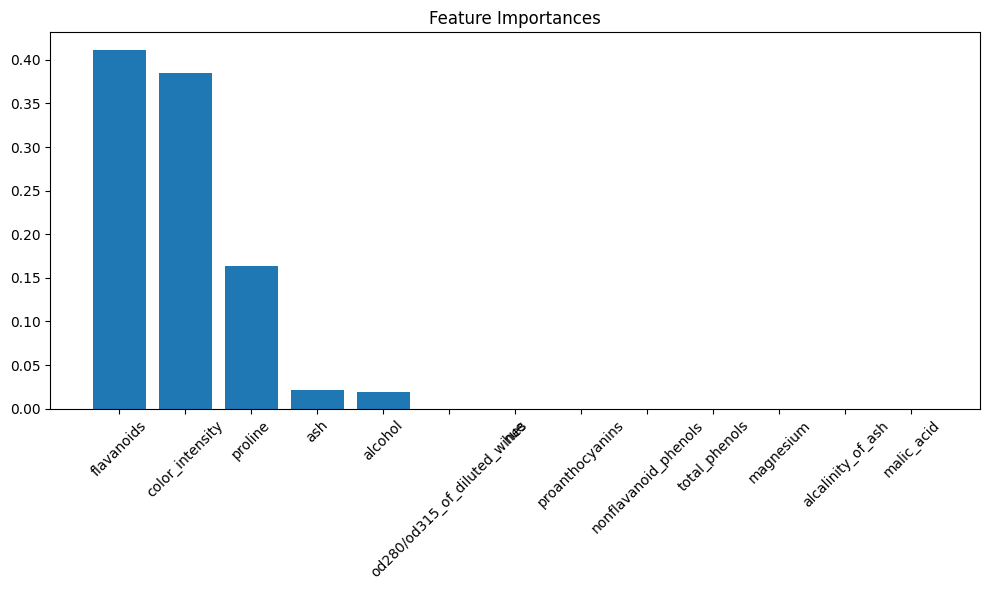

In [39]:
# Step 10: Feature Importance
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = wine.feature_names

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# Regression Tree

Mean Squared Error: 1.38


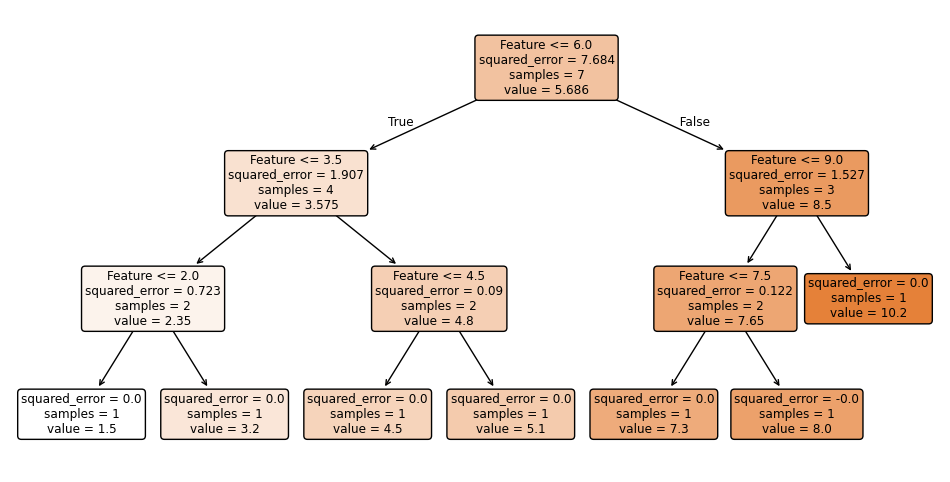

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a sample dataset
data = {
    'Feature': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Target': [1.5, 1.7, 3.2, 4.5, 5.1, 6.8, 7.3, 8.0, 9.1, 10.2]
}
df = pd.DataFrame(data)

# Prepare features and target variable
X = df[['Feature']]
y = df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree regressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the structure of the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(regressor, filled=True, feature_names=['Feature'], rounded=True)
plt.show()